In [ ]:
#Import Libraries and Mount Google Drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading and Exploration of Data
# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/bitcoin_2017_to_2023.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


             timestamp      open      high       low     close    volume  \
0  2023-08-01 13:19:00  28902.48  28902.49  28902.48  28902.49   4.68658   
1  2023-08-01 13:18:00  28902.48  28902.49  28902.48  28902.49   4.77589   
2  2023-08-01 13:17:00  28908.52  28908.53  28902.48  28902.49  11.52263   
3  2023-08-01 13:16:00  28907.41  28912.74  28907.41  28908.53  15.89610   
4  2023-08-01 13:15:00  28896.00  28907.42  28893.03  28907.41  37.74657   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0        1.354538e+05               258                      0.89391   
1        1.380351e+05               317                      2.24546   
2        3.330532e+05               451                      2.70873   
3        4.595556e+05               483                     10.22981   
4        1.090761e+06               686                     16.50452   

   taker_buy_quote_asset_volume  
0                  25836.224836  
1                  64899.385195  
2       

In [ ]:
#Data Cleaning and Preprocessing
#Convert 'timestamp' to datetime format
df['timestamp']= pd.to_datetime(df['timestamp'])
df= df.dropna()
df.set_index('timestamp',inplace=True)

In [ ]:
#Historical Stock Data Analysis
#Calculate daily returns
df['Daily_Return']=df['close'].pct_change()
print(df['Daily_Return'])

timestamp
2023-08-01 13:19:00         NaN
2023-08-01 13:18:00    0.000000
2023-08-01 13:17:00    0.000000
2023-08-01 13:16:00    0.000209
2023-08-01 13:15:00   -0.000039
                         ...   
2017-08-17 04:04:00    0.000000
2017-08-17 04:03:00    0.000000
2017-08-17 04:02:00    0.004477
2017-08-17 04:01:00   -0.004457
2017-08-17 04:00:00    0.000000
Name: Daily_Return, Length: 3126000, dtype: float64


In [ ]:
#Financial Dashboard with Key Metrics
dashboard_data =df[['close','volume']].resample('D').last()

#Line graph for Bitcoin Close Price
fig1= px.line(dashboard_data, x=dashboard_data.index, y='close', labels={'Close Price':'Bitcoin Close Proce'})
fig1.update_layout(title='Bitcoin Close Price Trends', xaxis_title= 'Date',yaxis_title= 'Price(USD)')
fig2 = px.bar(dashboard_data, x=dashboard_data.index, y='volume', labels={'Volume':'Trading Volume'})
fig2.update_layout(title='Bitcoin Trading Volume', xaxis_title= 'Date',yaxis_title='Volume')
fig1.show()
fig2.show()

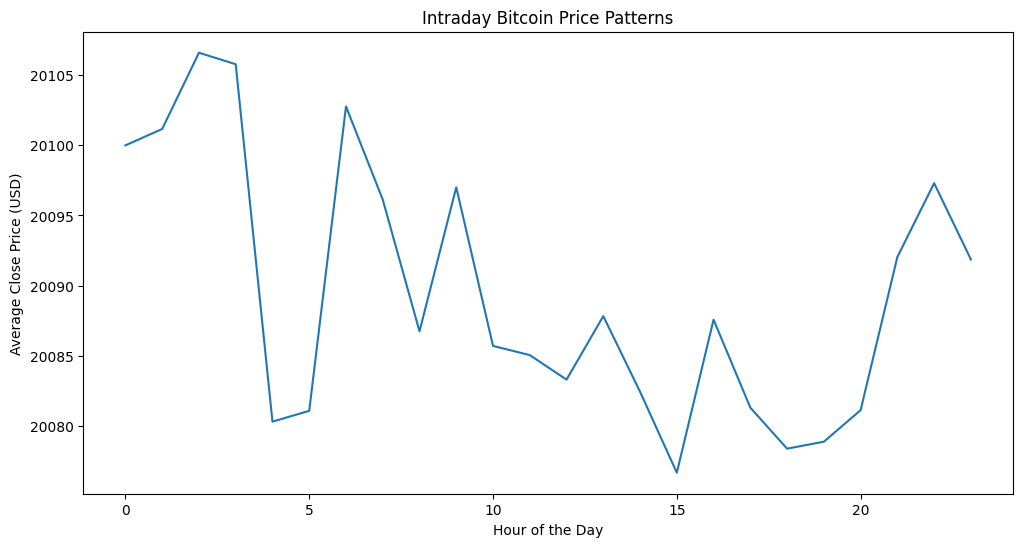

In [ ]:
# Extract hour from timestamp
df['Hour'] = df.index.hour
hourly_price_avg = df.groupby('Hour')['close'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_price_avg.index, y=hourly_price_avg.values)
plt.title('Intraday Bitcoin Price Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Close Price (USD)')
plt.show()


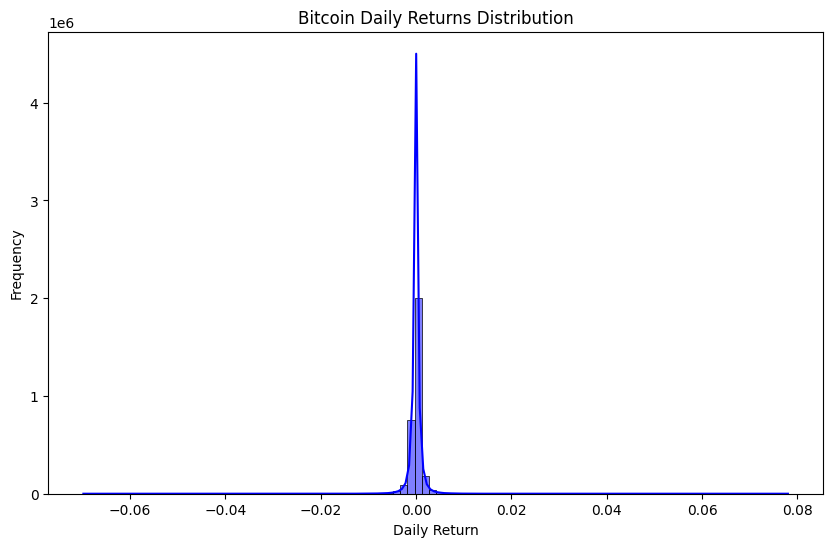

In [ ]:
# Visualize volatility
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color='blue')
plt.title('Bitcoin Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


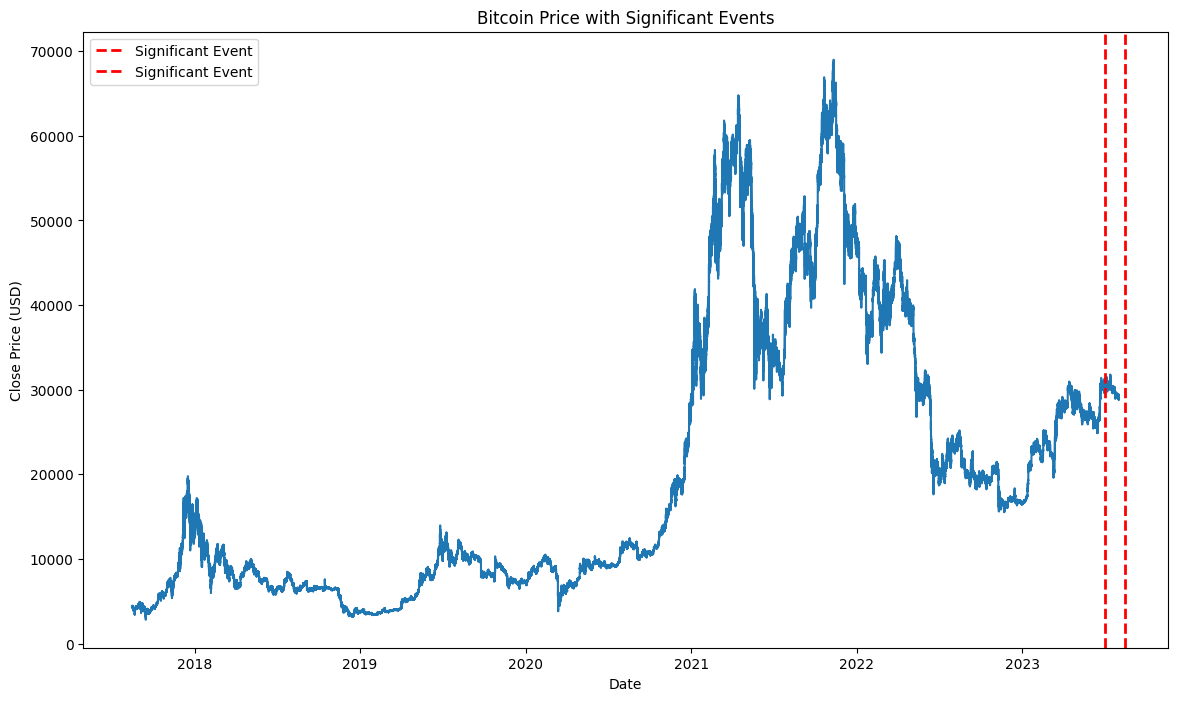

In [ ]:
# Plot significant events on the price chart (provide event dates)
significant_events = {'Event 1': '2023-08-15', 'Event 2': '2023-07-01'}
event_dates = pd.to_datetime(list(significant_events.values()))

plt.figure(figsize=(14, 8))
sns.lineplot(x=df.index, y=df['closel'])
plt.title('Bitcoin Price with Significant Events')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

# Mark significant events
for event_date in event_dates:
    plt.axvline(event_date, color='red', linestyle='--', linewidth=2, label='Significant Event')

plt.legend()
plt.show()


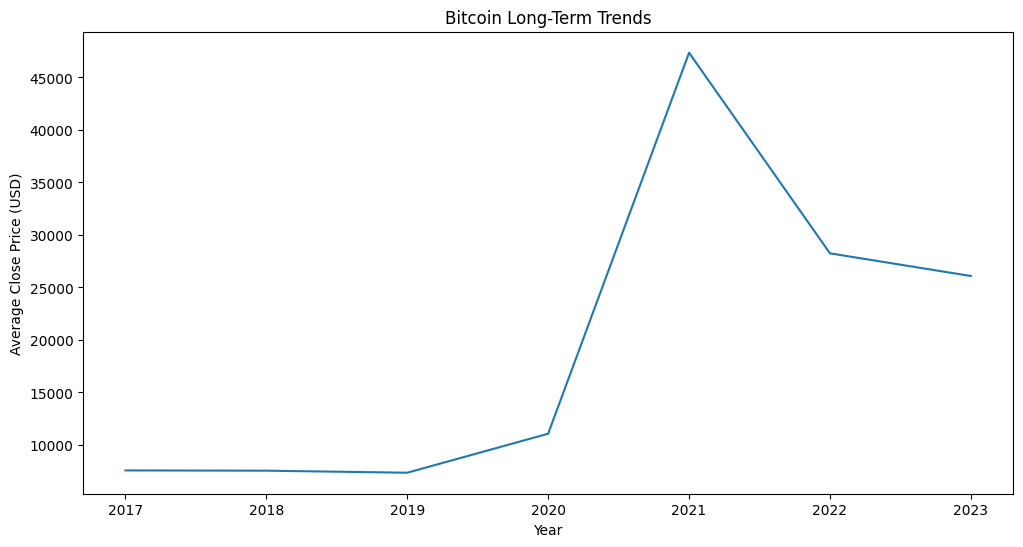

In [ ]:
# Resample data to yearly frequency and calculate mean close price
yearly_trends = df['close'].resample('Y').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index.year, y=yearly_trends.values)
plt.title('Bitcoin Long-Term Trends')
plt.xlabel('Year')
plt.ylabel('Average Close Price (USD)')
plt.show()


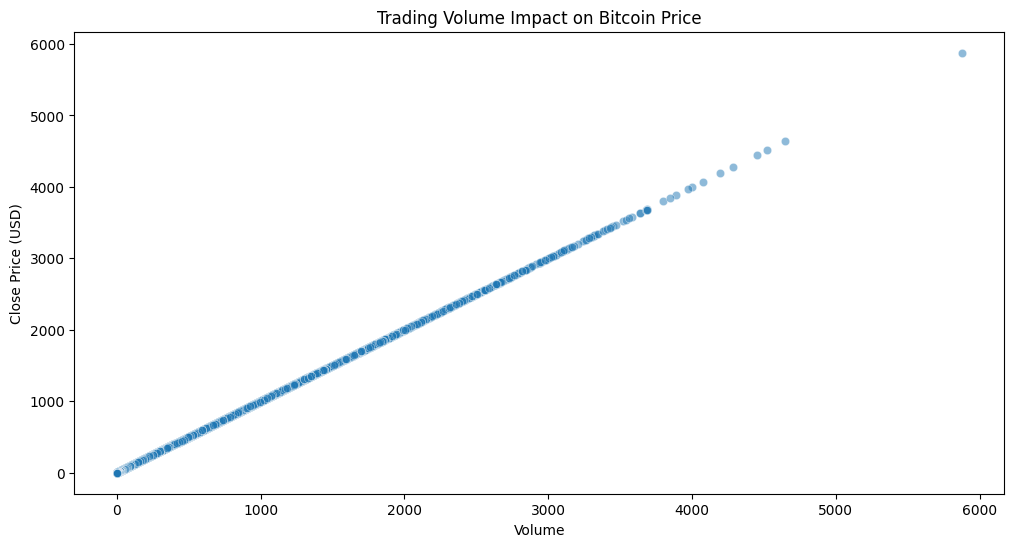

In [ ]:
# Visualize trading volume and price movement
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['volume'], y=df['volume'], alpha=0.5)
plt.title('Trading Volume Impact on Bitcoin Price')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.show()
